In [182]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import pandas as pd
from sklearn.model_selection import train_test_split

In [183]:
df = pd.read_csv('weightdataset.csv',sep=';')

In [184]:
x = scale(df.Weight) 
y = scale(df.Height)

In [185]:
W = np.random.random(2)

In [186]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3)

In [187]:
n = len(x)
X = np.c_[np.ones(n),x]
def X_traine(x_train):
    n = len(x)
    X_train = np.c_[np.ones(n),x_train]
    return X_train

def X_teste(x_test):
    n = len(x)
    X_test = np.c_[np.ones(n),x_test]
    return X_test
u11 = X_train.dot(W) 
o11 = (1/(1 + np.exp(X_train))) 

In [188]:
derivative = ((1/(1 + np.exp(-X_test*W)))*(1/(1 + np.exp(-X_test*W))) * -X_test)

In [189]:
Epochs = 1000
lr = 0.001
y_pred = (1/(1 + np.exp(-X_test)))

def gradientdescent(X_i,x,w,y_pred,Epochs,derivative,lr):
    c = []
    b = []
    a = 0
    n = len(x)
    
    for i in range(Epochs):
        X_i = X_i.reshape(len(X_i),1)
        a = -np.sum((X_i *np.log(w) + (1 - X_i)*np.log(1 - w)))
        c.append(a)
        w = w - (lr*(1/n)*sum(y_pred - X_i))
        b.append(w)
        
    return(c, b)


In [190]:
MSE,updated_b = gradientdescent(y_test,y_pred,W,X_test,Epochs,derivative,lr)
b = updated_b[-1] 

C:\Users\Unarine\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


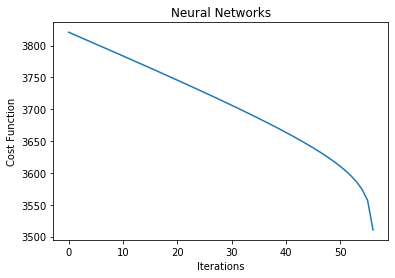

In [191]:
plt.plot(MSE)
plt.title('Neural Networks')
plt.ylabel('Cost Function')
plt.xlabel('Iterations')
plt.show()